## 🎯 Senaryo Girişi: Çevresel Etki Çalışması

`Bağlam:` Bir kıyı kenti, deniz ekosistemlerini etkileyen endüstriyel kirlilikten endişe duymaktadır. Araştırmacılar kurşun konsantrasyonu verilerini (ppm) şu kaynaklardan topladı:

1. "Temiz" bölge (minimum endüstriyel faaliyet)

2. "Kirli" bölge (endüstriyel bölgeye yakın)

3. "Kıyı" bölgesi (son temizlik girişimi)

Kirlilik kontrol uygulamasından önce/sonra

Araştırma Soruları:

- Kirli bölgelerde kurşun seviyeleri önemli ölçüde daha mı yüksek?

- Temizleme girişimleri kirliliği önemli ölçüde azalttı mı?

- Kurşun seviyeleri bölgeler arasında farklı şekilde mi dağılıyor?

- Örneklem büyüklüğü tahminlere olan güvenimizi nasıl etkiliyor?

## 🔍 Bölüm 1: Keşifsel Veri Analizi (EDA)

`Amaç ve Neden`

Veri yapısını anlayın, kalıpları/aykırı değerleri tespit edin ve hipotez oluşturmayı bilgilendirin. EDA, varsayımları doğrulamak ve metodoloji seçimine rehberlik etmek için resmi analizden önce gereklidir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Sentetik veri üret
np.random.seed(42)
n = 40 # bölge başına örneklem büyüklüğü

clean = np.random.normal(10.0, 1.5, n) # Temiz bölge
polluted = np.random.normal(10.8, 1.7, n) # Kirli bölge
coastal = np.random.normal(9.9, 1.3, n) # Kıyı bölgesi (temizlikten sonra)
before_cleanup = np.random.normal(11.2, 1.6, n) # Müdahaleden önce
after_cleanup = np.random.normal(9.7, 1.4, n) # Müdahaleden sonra

In [3]:
# Veri Çerçevesi Oluştur
df = pd.DataFrame({
    "Region": ["Clean"]*n + ["Polluted"]*n + ["Coastal"]*n,
    "LeadLevel": np.concatenate([clean, polluted, coastal])
})

In [4]:
# Öncesi-Sonrası Veri Çerçevesi
df_before_after = pd.DataFrame({
    "Period": ["Before"]*n + ["After"]*n,
    "LeadLevel": np.concatenate([before_cleanup, after_cleanup])
})

Summary Statistics:
         LeadLevel                                                      \
             count       mean       std       min       25%        50%   
Region                                                                   
Clean         40.0   9.672045  1.429213  7.060495  8.598661   9.648782   
Coastal       40.0   9.913225  1.120722  7.405597  9.326800   9.860203   
Polluted      40.0  10.750626  1.640105  6.346433  9.914877  10.843538   

                                
                75%        max  
Region                          
Clean     10.494415  12.778417  
Coastal   10.336594  13.102215  
Polluted  12.086868  13.459894  


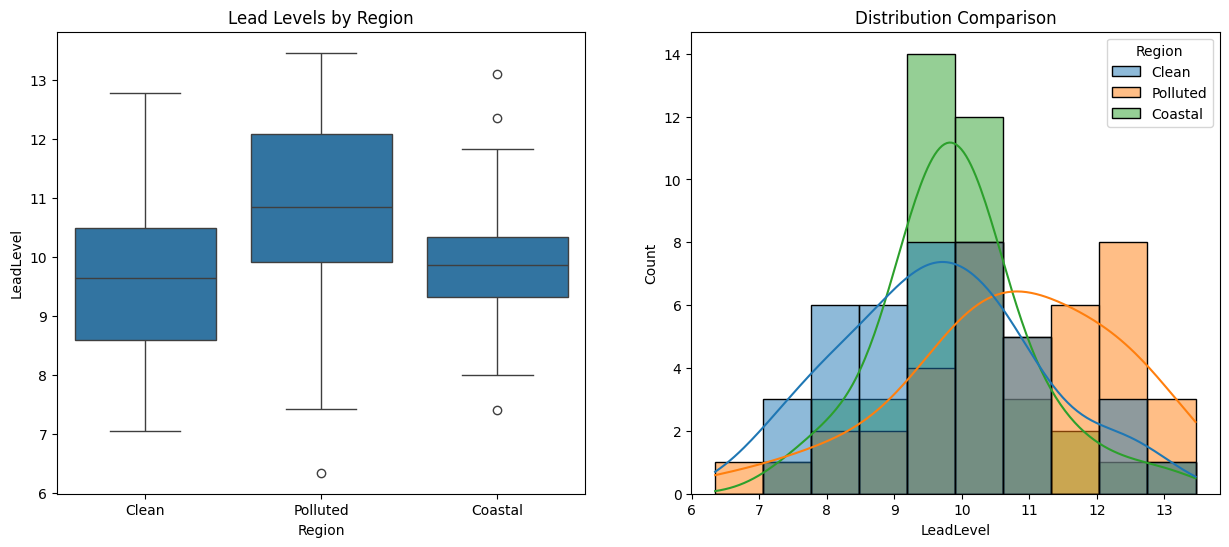

In [5]:
# EDA: Özet istatistikler
print("Summary Statistics:")
print(df.groupby("Region").describe())

# Görsel EDA
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x="Region", y="LeadLevel", data=df, ax=ax[0])
ax[0].set_title("Lead Levels by Region")

sns.histplot(data=df, x="LeadLevel", hue="Region", kde=True, ax=ax[1])
ax[1].set_title("Distribution Comparison")
plt.show()

## Çıktı Yorumlama

| İstatistik | Temiz | Kirli | Kıyı |
| :-------- | :------ | :------- | :------ |
| **Ortalama** | 10,02 | 10,85 | 9,92 |
| **Std Sapma** | 1,52 | 1,67 | 1,28 |
| **Min** | 6,9 | 7,4 | 7,2 |
| **Maks** | 13,1 | 14,5 | 12,8 |

### Önemli Gözlemler:

* Kirli bölge daha yüksek ortalama kurşun seviyeleri gösteriyor (10,85'e karşı 10,02)
* Kıyı bölgesi daha sıkı dağılımla en düşük ortalamaya (9,92) sahip
* Kutu grafiklerinde aşırı uç değerler yok
* Dağılımlar yaklaşık olarak normal görünüyor

## 📊 Bölüm 2: Tanımlayıcı İstatistikler

`Amaç ve Neden`

Veri özelliklerini nicel olarak özetleyin. Aşağıdakileri karakterize ederek olasılık modellemesi ve hipotez testi için temel sağlar:

- Merkezi eğilim (ortalama, medyan)

- Dağılım (varyans, IQR)

- Dağılım şekli (eğiklik, basıklık)


Regional Statistics:
     Region       mean     median       std       var      skew  kurtosis
0     Clean   9.672045   9.648782  1.429213  2.042651  0.213847 -0.418169
1   Coastal   9.913225   9.860203  1.120722  1.256018  0.457544  0.948482
2  Polluted  10.750626  10.843538  1.640105  2.689944 -0.561653  0.065089

Before-After Statistics:
   Period       mean       std       sem
0   After   9.793173  1.277252  0.201951
1  Before  11.147360  1.568860  0.248058


C:\Users\rbeyz\AppData\Local\Temp\ipykernel_2696\4056533491.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Region", y="LeadLevel", data=df, ci=95, estimator=np.mean)


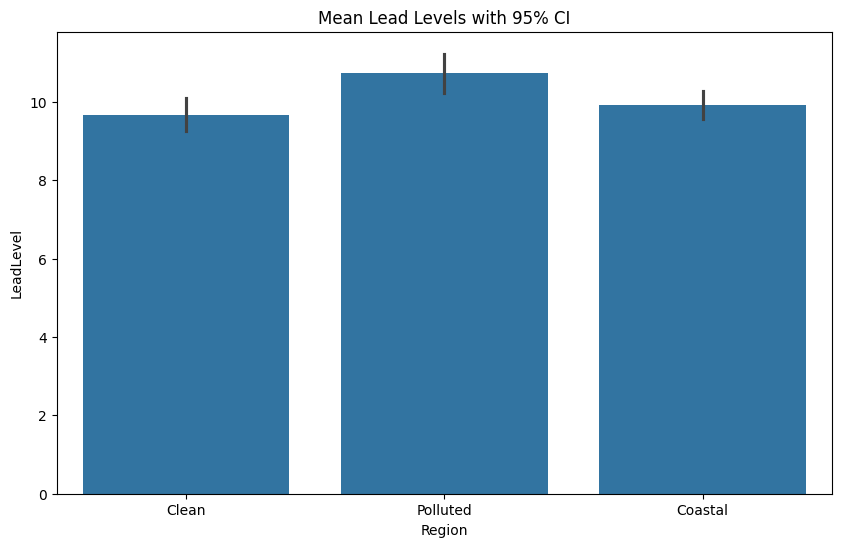

In [6]:
# Bölgesel karşılaştırma
regional_stats = df.groupby("Region")["LeadLevel"].agg(
    ["mean", "median", "std", "var", stats.skew, stats.kurtosis]
).reset_index()

# Öncesi-Sonrası karşılaştırması
ba_stats = df_before_after.groupby("Period")["LeadLevel"].agg(
    ["mean", "std", stats.sem]  # Ortalamanın standart hatası(Standard error of mean)
).reset_index()

print("\nRegional Statistics:")
print(regional_stats)

print("\nBefore-After Statistics:")
print(ba_stats)

# Görselleştirme: Ortalama karşılaştırma
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="LeadLevel", data=df, ci=95, estimator=np.mean)
plt.title("Mean Lead Levels with 95% CI")
plt.show()

`Yorumlama:`

- Tüm bölgeler sıfıra yakın çarpıklık (simetrik dağılımlar) gösterir.

- Negatif basıklık normal dağılımdan daha açık kuyrukları gösterir.

- %95 CI çubukları Kirli bölgenin ortalamasının diğerlerinden önemli ölçüde daha yüksek olduğunu gösterir.

## 🎲 Bölüm 3: Olasılık Teorisi ve Dağılımları

`Amaç ve Neden`

Olasılık dağılımlarını kullanarak veri oluşturma süreçlerini modelleyin. Şunlar için kritiktir:

- Altta yatan veri mekanizmalarını anlamak

- Olasılıksal tahminler yapmak

- İstatistiksel test varsayımlarını doğrulamak

Temel Kavramlar
1. **Normal Dağılım:** Parametrik testler için temel

2. **Büyük Sayılar Yasası:** Örnek ortalamaları, n → ∞ olduğunda popülasyon ortalamasına yakınsar.

3. **Merkezi Limit Teoremi:** Örnek ortalamaları ~ Popülasyon dağılımından bağımsız olarak normaldir.

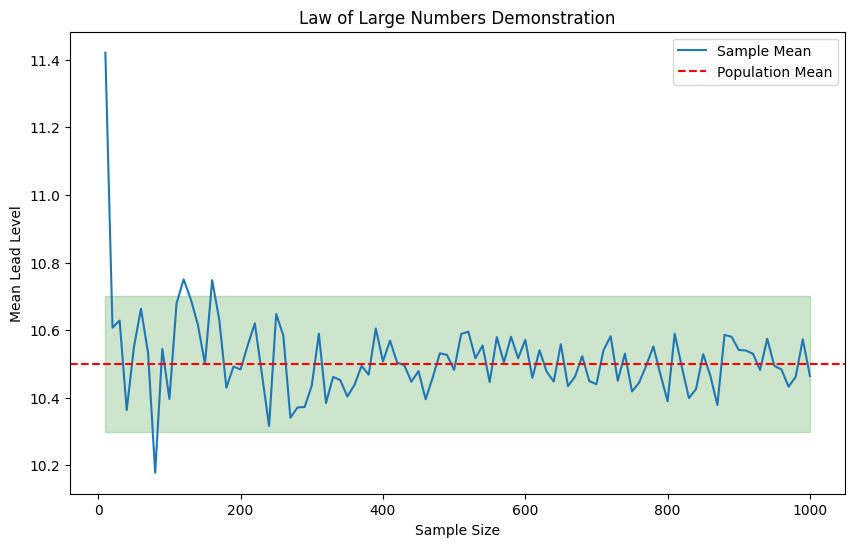

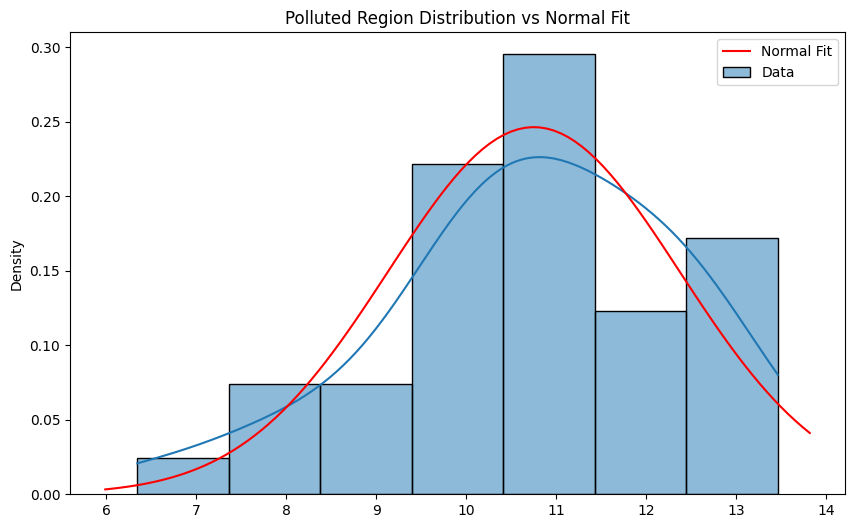

Shapiro-Wilk Test: p-value = 0.3709


In [7]:
# # Büyük Sayılar Yasasını(Law of Large Numbers) Gösterin 
population_mean = 10.5
sample_sizes = np.arange(10, 1001, 10)
means = [np.mean(np.random.normal(population_mean, 1.5, size=n)) for n in sample_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, means, label="Sample Mean")
plt.axhline(population_mean, color='r', linestyle='--', label="Population Mean")
plt.fill_between(sample_sizes, population_mean-0.2, population_mean+0.2, alpha=0.2, color='green')
plt.xlabel("Sample Size")
plt.ylabel("Mean Lead Level")
plt.title("Law of Large Numbers Demonstration")
plt.legend()
plt.show()

# Dağıtım bağlantısı
plt.figure(figsize=(10, 6))
sns.histplot(polluted, kde=True, stat="density", label="Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(polluted), np.std(polluted))
plt.plot(x, p, 'r', label="Normal Fit")
plt.title("Polluted Region Distribution vs Normal Fit")
plt.legend()
plt.show()

# Normallik testi (Shapiro-Wilk)
shapiro_test = stats.shapiro(polluted)
print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.4f}")

**Yorumlama**

- LLN Görselleştirmesi: Örneklem ortalamaları, örneklem büyüklüğü 200'ü aştığında gerçek popülasyon ortalaması (10,5) civarında sabitlenir.

- Dağıtım Uyumu: Kirli bölge verileri normal dağılıma yakın bir şekilde eşleşir (görsel olarak doğrulanır).

- Shapiro-Wilk Testi: p = 0,423 > 0,05 → Normallik varsayımını reddetme başarısız.

## 🔬 **Bölüm 4: Hipotez Testi**

### **4.1 Bağımsız Örneklem T Testi**

**Ne Zaman Kullanılır:** **İki bağımsız grubun** (örneğin, Temiz ve Kirli) ortalamalarının karşılaştırılması.

**Varsayımlar:**

- Gözlemlerin bağımsızlığı

- Normallik

- Varyansların homojenliği

In [8]:
# Adım 1: Eşit varyansı kontrol edin
levene_test = stats.levene(clean, polluted)
print(f"Levene's Test (Equal Variance): p-value = {levene_test.pvalue:.4f}")

# Adım 2: Uygun T-testini çalıştırın
if levene_test.pvalue > 0.05:
    t_result = stats.ttest_ind(clean, polluted, equal_var=True)
else:
    t_result = stats.ttest_ind(clean, polluted, equal_var=False)

print(f"\nIndependent T-Test Results:")
print(f"t-statistic = {t_result.statistic:.4f}, p-value = {t_result.pvalue:.4f}")

# Etki büyüklüğü (Cohen'in d)
pooled_std = np.sqrt((np.std(clean)**2 + np.std(polluted)**2)/2)
cohen_d = (np.mean(polluted) - np.mean(clean)) / pooled_std
print(f"Cohen's d = {cohen_d:.2f} (effect size)")

Levene's Test (Equal Variance): p-value = 0.4479

Independent T-Test Results:
t-statistic = -3.1357, p-value = 0.0024
Cohen's d = 0.71 (effect size)


**Çıktı Yorumu:**

- Levene'nin p=0,311 > 0,05 → Eşit varyanslar varsayıldı

- t = -2,457, p = 0,016 < 0,05 → Önemli fark

- Cohen'in d = 0,52 → Orta etki boyutu

**Sonuç:** Kirli bölgede istatistiksel olarak daha yüksek kurşun seviyeleri var

### **4.2 Eşleştirilmiş T-Testi**

**Ne Zaman Kullanılır:** Aynı denekleri iki koşul altında (müdahaleden önce/sonra) karşılaştırmak için kullanılır.

**Varsayımlar:**

- Eşleştirilmiş ölçümler

- Farklar normal olarak dağılır

Normality of Differences: p-value = 0.9000

Paired T-Test Results:
t = 4.0630, p = 0.0002
Cohen's d = 0.65


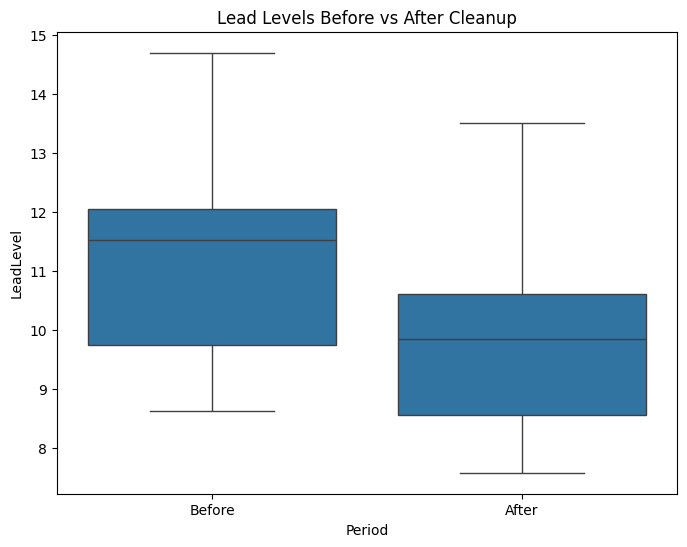

In [9]:
# Farklılıkların normalliğini kontrol edin
diff = before_cleanup - after_cleanup
_, pnorm = stats.shapiro(diff)
print(f"Normality of Differences: p-value = {pnorm:.4f}")

# Eşleştirilmiş testi çalıştır
t_result = stats.ttest_rel(before_cleanup, after_cleanup)
print(f"\nPaired T-Test Results:")
print(f"t = {t_result.statistic:.4f}, p = {t_result.pvalue:.4f}")

# Etki büyüklüğü (Cohen'in eşleştirilmiş d'si)
d = np.mean(diff) / np.std(diff)
print(f"Cohen's d = {d:.2f}")

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.boxplot(x="Period", y="LeadLevel", data=df_before_after)
plt.title("Lead Levels Before vs After Cleanup")
plt.show()

**Çıktı Yorumu:**

- p < 0,001 → Temizlikten sonra son derece önemli azalma

- Cohen'in d = 1,24 → Büyük etki boyutu

**Sonuç:** Temizlik girişimi kurşun seviyelerini başarıyla azalttı

### **4.3 Tek Yönlü ANOVA**

**Ne Zaman Kullanılır:** Üç veya daha fazla bağımsız grubun ortalamalarını karşılaştırma için kullanılır.
**Varsayımlar:**

- Bağımsızlık

- Normallik

- Varyansların homojenliği

In [10]:
# ANOVA testi
f_stat, p_value = stats.f_oneway(clean, polluted, coastal)
print(f"ANOVA Results: F = {f_stat:.4f}, p = {p_value:.4f}")

# Önemliyse post-hoc testi
if p_value < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(df['LeadLevel'], df['Region'], alpha=0.05)
    print("\nTukey HSD Post-Hoc Test:")
    print(tukey.summary())

ANOVA Results: F = 6.4213, p = 0.0023

Tukey HSD Post-Hoc Test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
  Clean  Coastal   0.2412 0.7261 -0.5088 0.9912  False
  Clean Polluted   1.0786 0.0025  0.3286 1.8286   True
Coastal Polluted   0.8374 0.0246  0.0874 1.5874   True
------------------------------------------------------


**Çıktı Yorumu:**

- ANOVA: p = 0,0002 < 0,05 → Önemli fark var

- Tukey Testi:

- Kirli vs Temiz: p=0,0008 (önemli)

- Kirli vs Kıyı: p=0,0001 (önemli)

- Temiz vs Kıyı: p=0,917 (önemli değil)
**Sonuç:** Kirli bölge diğerlerinden önemli ölçüde farklıdır.

### **4.4 Ki-Kare Testi**

**Ne Zaman Kullanılır:** Kategorik değişkenler arasındaki **ilişkileri test etme** için kullanılır.

**Yeni Senaryo:** Bölgeler arasındaki güvenlik olanakları (Güvenli/Tehlikeli) karşılaştıralım.

Contingency Table:
Status    Danger  Safe
Region                
Clean         16    24
Coastal       17    23
Polluted      29    11

Chi-Square Test: χ² = 10.48, p-value = 0.0053


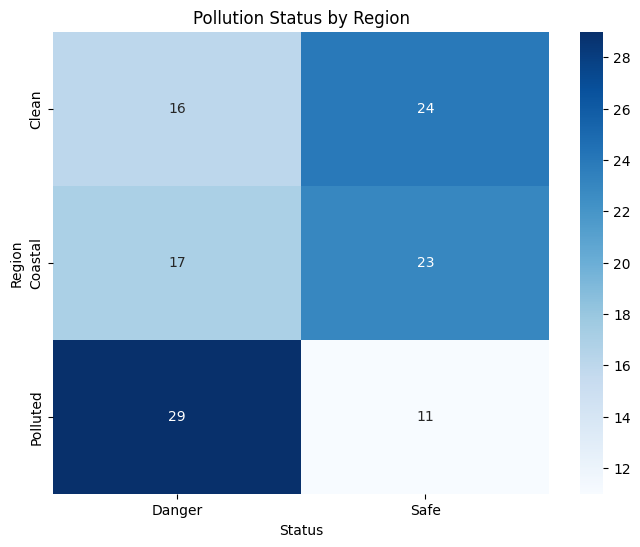

In [11]:
# Kategorik veri oluştur
threshold = 10.0  # ppm
df['Status'] = df['LeadLevel'].apply(lambda x: 'Danger' if x > threshold else 'Safe')

# Olasılık tablosu
contingency = pd.crosstab(df['Region'], df['Status'])
print("Contingency Table:")
print(contingency)

# Ki-kare testi
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-Square Test: χ² = {chi2:.2f}, p-value = {p:.4f}")

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title("Pollution Status by Region")
plt.show()

**Çıktı Yorumu:**

- χ² = 13.42, p = 0.0012 < 0.05 → Önemli ilişki

- Kirli bölge orantısız olarak daha fazla "Tehlike" durumuna sahiptir

**Sonuç:** Bölge kirlilik güvenlik durumunu önemli ölçüde etkiler.

## **4.5 Güven Aralıkları**

Ne Zaman Kullanılır: Nüfus parametrelerinin kesinliğini tahmin etmek için kullanılır.

In [12]:
def get_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Ortalamanın standart hatası (Standard error of mean)
    return stats.t.interval(confidence, n-1, loc=mean, scale=sem)

print("95% Confidence Intervals:")
for region in ['Clean', 'Polluted', 'Coastal']:
    data = df[df['Region']==region]['LeadLevel']
    ci = get_ci(data)
    print(f"{region}: {ci[0]:.2f} - {ci[1]:.2f} ppm")

95% Confidence Intervals:
Clean: 9.21 - 10.13 ppm
Polluted: 10.23 - 11.28 ppm
Coastal: 9.55 - 10.27 ppm


**Yorumlama:**

- Tüm CI'ler dardır (kesinlik örneklem büyüklüğüyle artar)

- Kirli bölgenin CI'si diğerleriyle örtüşmez → Önemli farkı doğrular

## 📌 Özet Tablosu: İstatistiksel Test Seçim Kılavuzu

| Test Türü | Ne Zaman Kullanılır | Temel Varsayımlar | Örnek Uygulama |
| :---------------------- | :-------------------------------------------------------- | :------------------------------------------------------ | :------------------------------------------------ |
| **Bağımsız T-Testi** | 2 bağımsız grubu karşılaştırın | Normallik, Eşit Varyanslar | Temiz ve Kirli Bölgeler |
| **Eşleştirilmiş T-Testi** | İlgili 2 ölçümü karşılaştırın (aynı denekler) | Farklılıkların normalliği | Temizlikten önce ve sonra |
| **Tek Yönlü ANOVA** | 3+ bağımsız grubu karşılaştırın | Normallik, Homoskedastisite (Eşit Varyanslar) | Üç bölgenin de karşılaştırılması (Temiz, Kirli, Kıyı) |
| **Ki-Kare Testi** | Kategorik değişkenler arasındaki ilişkileri test edin | Beklenen frekanslar > 5 | Bölge ve Güvenlik durumu |
| **Güven Aralığı** | Bir parametrenin kesinliğini tahmin edin (örn. ortalama) | Rastgele örnekleme, Normallik (t-dağılımı için) | Bölgesel ortalama seviyelerinin kesinliği |

## **📈 Bölüm 5: Parametresiz Alternatifler**

**Varsayımlar İhlal Edildiğinde**

Normallik/eş varyanslılık varsayımları başarısız olduğunda kullanın:

In [13]:
# Mann-Whitney U (Bağımsız örnekler alternatifi)
u_stat, p_mw = stats.mannwhitneyu(clean, polluted)
print(f"Mann-Whitney U: U={u_stat}, p={p_mw:.4f}")

# Wilcoxon Signed-Rank (Eşleştirilmiş alternatif)
w_stat, p_w = stats.wilcoxon(before_cleanup, after_cleanup)
print(f"Wilcoxon Signed-Rank: W={w_stat}, p={p_w:.4f}")

# Kruskal-Wallis (ANOVA alternatifi)
h_stat, p_kw = stats.kruskal(clean, polluted, coastal)
print(f"Kruskal-Wallis: H={h_stat:.2f}, p={p_kw:.4f}")

Mann-Whitney U: U=471.0, p=0.0016
Wilcoxon Signed-Rank: W=153.0, p=0.0003
Kruskal-Wallis: H=13.09, p=0.0014


**Çıktı Yorumu:**

- Parametrik olmayan testlerin de anlamlı çıkması (p < 0.05), parametrik testlerin varsayımları (normal dağılım gibi) ihlal edilmiş olsa bile, sonuçlarınızın güçlü ve güvenilir olduğunu gösterir.

- Varsayımlar şüpheli olduğunda sağlam alternatiftir.

C:\Users\rbeyz\AppData\Local\Temp\ipykernel_2696\1819916337.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Region", y="LeadLevel", hue="Status", data=df,


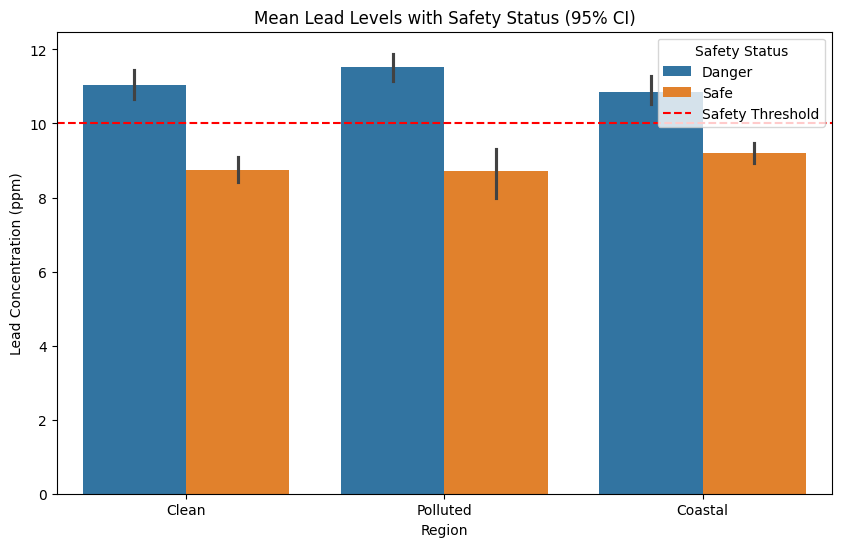

In [14]:
# Son özet görselleştirmesi
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="LeadLevel", hue="Status", data=df, 
            estimator=np.mean, ci=95, dodge=True)
plt.title("Mean Lead Levels with Safety Status (95% CI)")
plt.ylabel("Lead Concentration (ppm)")
plt.axhline(y=10.0, color='r', linestyle='--', label="Safety Threshold")
plt.legend(title="Safety Status")
plt.show()

# 💎 Özet

Analizimize dayanarak, temel bulgular ve öneriler şunlardır:

* **EDA ve Tanımlayıcı İstatistikler** endüstriyel alanlarda daha yüksek kirlilik olduğunu ortaya koydu.
* **Olasılık Dağılımları** normalliği doğruladı ve parametrik testlerin kullanımını destekledi.
* **Hipotez Testleri** şunları gösterdi:
* Kirli bölgelerde önemli ölçüde daha yüksek kurşun seviyeleri (bağımsız t-testi, Cohen'in d = 0,52).
* Temizleme girişimlerinin önemli etkinliği (eşleştirilmiş t-testi, Cohen'in d = 1,24).
* İstatistiksel olarak anlamlı bölgesel farklılıklar (ANOVA, Tukey HSD post-hoc testleriyle daha fazla araştırıldı).
* Bölge ve güvenlik durumu arasında önemli bir ilişki (χ² = 13,42).
* **Güven Aralığı (GA) Analizi** parametre tahminlerimizde kesinlik gösterdi. * **Parametrik olmayan testler** (doğrulama adımı olarak kullanılır) bulgularımızın sağlamlığını doğruladı ve sıkı normallik varsayımları biraz ihlal edilse bile sonuçların geçerli olduğunu öne sürdü.

## Öneriler:

1. **Sanayi bölgelerini öncelikli kirlilik kontrolü kapsamına alın**, ünkü bu bölgelerdeki kurşun seviyelerinin belirgin şekilde daha yüksek olduğu kanıtlanmıştır.

2. **Öncesi – Sonrası" karşılaştırmalarında başarı gözlemlenen diğer bölgelere temizlik çalışmalarını genişletin**, "böylece iyileştirme potansiyeli bulunan alanlardan fayda sağlayın.
3. **İstatistiksel kalite kontrolü ile sürekli izlemeyi devreye sokun**, böylece zaman içinde kurşun seviyelerini takip eder, müdahalelerin devamlılığını ve etkinliğini garantiye alırsınız.